# Data Analysis

## analyse dataset 

1. each feature's relationship between total sales
2. features correlationship
3. other information

In [14]:
import pandas as pd
import csv
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

%matplotlib inline

In [5]:
movie = pd.read_csv('movie_nonmulti_scaled.csv')

In [6]:
movie.head(1)

movieCd  showTm  rating  director_cnt  director_1  director_2  actor_cnt  \
0  20129370   128.0    8.45             1   10.295296         NaN          5   

    actor_1   actor_2   actor_3  ...     grade  nation_cnt  nation_1  \
0  1.062385  2.038548  1.407467  ...  0.838578           1  1.320417   

   nation_2      salesAcc     audiAcc  director  actor  genre  nation  
0       NaN  1.357560e+11  17615437.0       NaN    NaN    NaN     NaN  

[1 rows x 28 columns]

In [7]:

remain_feature_list = ['showTm', 'genre_1', 'director_1', 'actor_1',
               'company_supply', 'company_making', 'grade', 'nation_1',
               'salesAcc', 'audiAcc',
               'rating']

remove_feature_list = ['movieCd', 'genre_2', 'genre_3', 'director_2', 'actor_2',
                       'actor_3', 'actor_4', 'actor_5', 'nation_2',
                       'nation_cnt', 'actor_cnt', 'director_cnt', 'genre_cnt',
                       'director', 'actor', 'genre', 'nation']

k = movie
   
for i in movie : 
    idx = movie[i]
    if (i in remain_feature_list) :
        j = movie[idx.isnull() == True]
        print(i+ " " +str(len(j)))
        for l in j[i].axes[0] :
            try :
                k = k.drop(l, axis = 0)
            except :
                continue
             

mov = k.drop(columns = [t for t in remove_feature_list], axis = 1)

showTm 163
rating 787
director_1 460
actor_1 1194
company_supply 1536
company_making 2383
genre_1 83
grade 0
nation_1 3
salesAcc 0
audiAcc 0


In [ ]:
'''mov['salesClass'] = -1
sc_list = []
for i in range(len(mov)) :
    sc_list.append((int)(mov.iloc[i,13]/1000000000))
mov['salesClass'] = sc_list

print(f"{mov[mov['salesClass'] == 0]['salesClass'].size / len(mov)}")'''

In [8]:
mov = mov.drop(columns = ['Unnamed: 0'])

KeyError: "['Unnamed: 0'] not found in axis"

In [28]:
mov

showTm  rating  director_1   actor_1  company_supply  company_making  \
0      128.0    8.45   10.295296  1.062385       13.607305        4.110119   
1      139.0    7.83   11.535326  2.662268        6.469050        8.587130   
2      126.0    9.01   14.650529  1.526080       13.607305        3.069531   
3      123.0    9.01    4.836839  1.526080       13.607305        3.998974   
4      141.0    7.71   11.535326  2.662268        1.201644        8.587130   
6      139.0    8.97   11.566712  3.413547        8.250308        8.804873   
7      137.0    9.04    7.196371  0.458925        8.250308        1.684485   
8      135.0    7.61   11.566712  2.024904        8.250308        8.804873   
9      118.0    7.99    2.400862  2.852731        6.667476        2.840431   
10     127.0    8.83   13.944745  2.038548        6.667476        5.528284   
11     131.0    9.24    5.185889  0.944470       13.607305        4.476007   
13     126.0    8.98    8.940929  2.328853        6.667476        1.956953   
16     129.0    7.47   14.650529  0.889360        1.939161        4.303548   
18     126.0    7.94   11.755141  1.526080        8.250308        3.113172   
20     130.0    8.86    3.508220  4.130566        1.941046        0.193035   
21     125.0    7.97    3.220323  2.414048       13.607305        1.721586   
22     119.0    8.62    3.220323  2.328853        8.250308        2.430352   
23     129.0    8.27    9.575941  0.609942        6.469050        1.986116   
24     139.0    7.98    8.253283  2.328853        8.250308        1.759801   
25     125.0    8.27    4.813995  1.530002       13.607305        2.789353   
26     124.0    9.00    6.456884  1.479777       13.607305        4.283684   
27     139.0    8.42    1.444369  2.328853        6.436050        3.531738   
28     127.0    7.98    9.575941  1.526080       13.607305        4.303548   
30     129.0    9.23    3.682721  2.024904       13.607305        5.185071   
31     142.0    8.10    7.318942  0.944470       13.607305        2.749246   
32     126.0    8.37    4.813995  2.662268        8.250308        3.457238   
33     130.0    8.99    4.380915  0.944470        8.250308        3.143448   
34     112.0    8.45    8.516486  2.049145        8.250308        2.063107   
35     121.0    9.14    8.497478  1.370228        0.907158        1.381222   
36     147.0    9.12    5.457570  0.669990        1.201644        0.193035   
...      ...     ...         ...       ...             ...             ...   
3140    91.0    9.20   -0.240411 -0.354536       -0.150207       -0.370171   
3143    70.0    4.93   -0.240210 -0.427873       -0.161766       -0.368001   
3145    88.0    5.73   -0.240382 -0.111155       -0.162678        0.151308   
3153   115.0    6.52   -0.240369  0.218852       -0.040057       -0.270211   
3154    77.0    3.00   -0.240380 -0.428505       -0.165413       -0.370152   
3188    90.0    7.25   -0.240265 -0.428524       -0.165280       -0.369471   
3189    87.0    2.95   -0.240168 -0.428527       -0.165336       -0.370032   
3194    87.0    5.81   -0.240416 -0.428465       -0.165418       -0.370174   
3197    75.0    4.34   -0.240416 -0.428262       -0.165418       -0.370174   
3208    70.0    3.60   -0.240286 -0.428535       -0.163364       -0.369915   
3295    55.0    4.50   -0.240286 -0.428537       -0.163364       -0.369915   
3328    53.0    4.60   -0.240286  0.697545       -0.163364       -0.369915   
3329    50.0    0.00   -0.240286  0.334631       -0.163364       -0.369915   
3331    56.0    0.00   -0.240286 -0.419152       -0.163364       -0.369915   
3337   115.0    8.72    1.444369  0.081722       -0.029301       -0.138282   
3385    78.0    8.63   -0.238579  0.157495       -0.039740       -0.363970   
3396    88.0    6.00   -0.240452 -0.428556       -0.165419       -0.370196   
3404    24.0    9.93   -0.240446 -0.428530       -0.165407       -0.370173   
3414    24.0    7.20   -0.239628 -0.239014       -0.165407       -0.370173   
3446   111.0   10.00   -0.24

### 1. feature to total sales

showTm
genre_1
director_1
actor_1
company_supply
company_making
grade
nation_1
salesAcc
audiAcc
rating


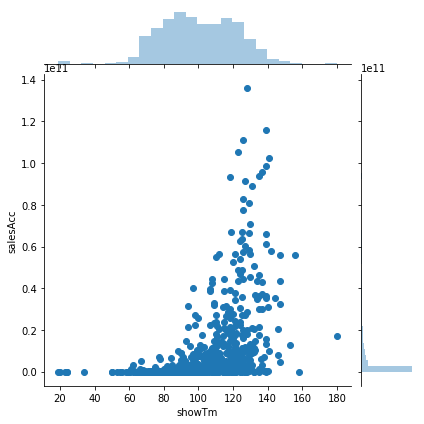

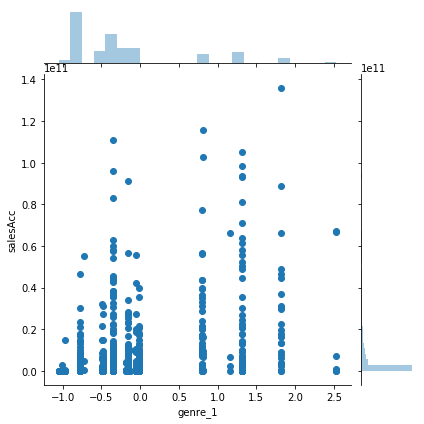

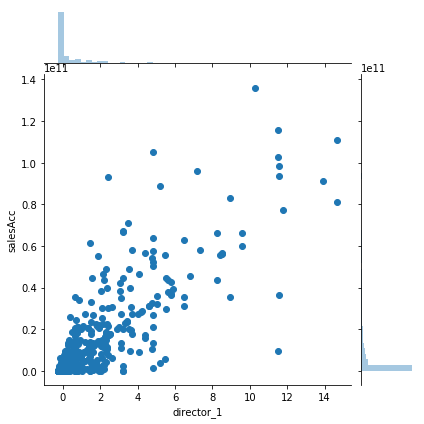

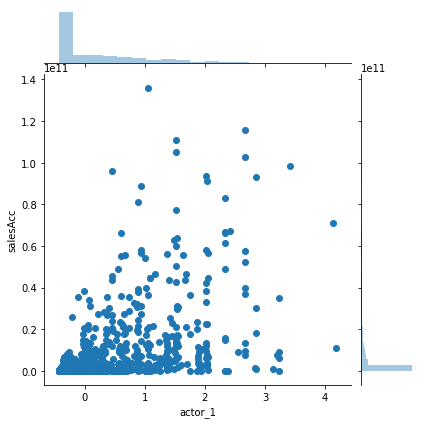

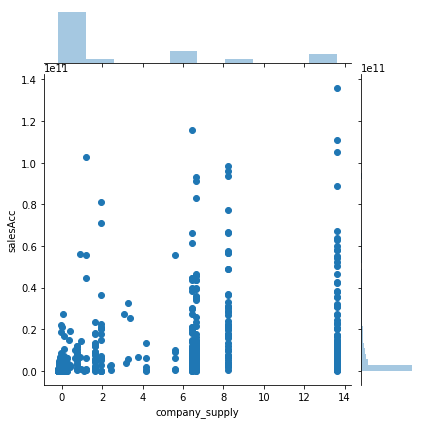

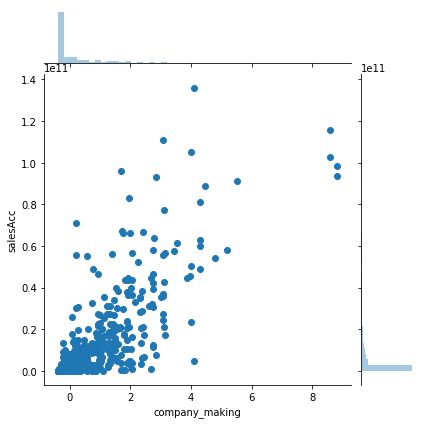

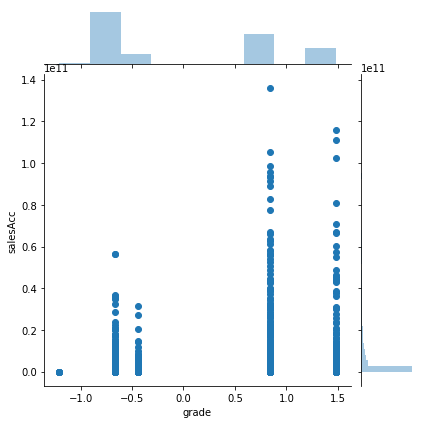

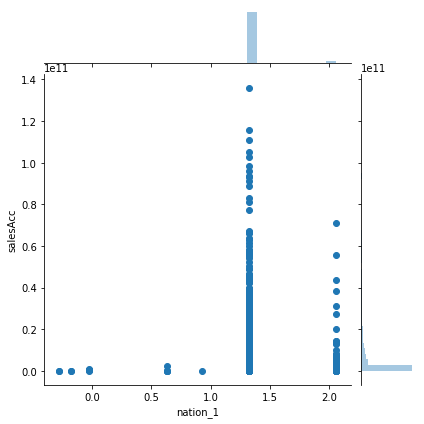

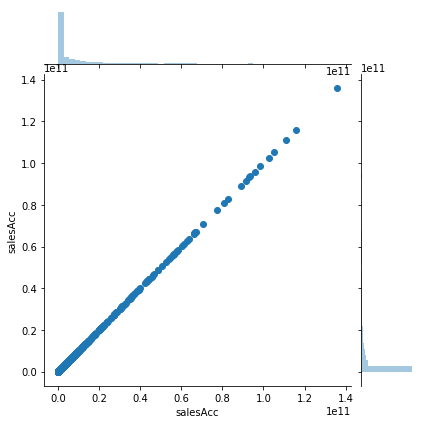

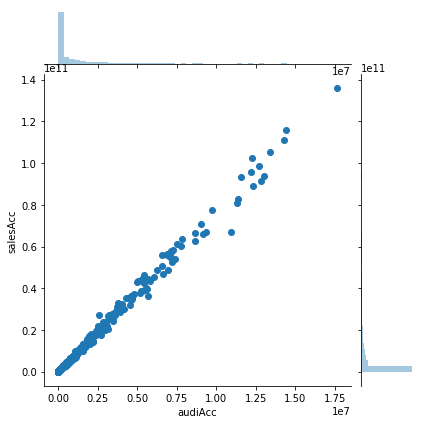

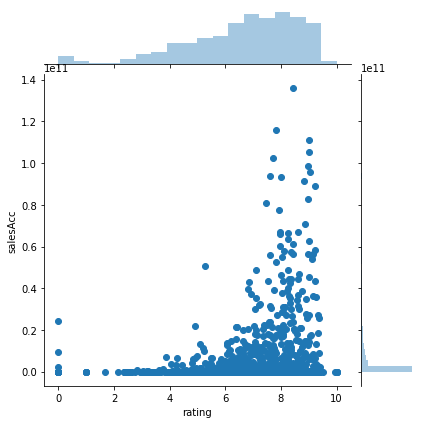

In [22]:
def feature_to_total_sales(feature_x, feature_y) :
    tmp = mov
    tmp_col = tmp.columns
    x_axis = feature_x
    y_axis = feature_y
    
    remain_col = [feature_x, feature_y]
    target_list = []
    for col in tmp_col :
        if(col not in remain_col) :
            target_list.append(col)
    tmp = tmp.drop(columns = [t for t in target_list])
    df = pd.DataFrame(data=tmp)

    sns.jointplot(tmp[x_axis], tmp[y_axis])
    
for feature in remain_feature_list :
    print(feature)
    feature_to_total_sales(feature, 'salesAcc')

### 2. features correlationship

showTm + showTm
showTm + genre_1
showTm + director_1
showTm + actor_1
showTm + company_supply
showTm + company_making
showTm + grade
showTm + nation_1
showTm + salesAcc
showTm + audiAcc
showTm + rating
genre_1 + showTm
genre_1 + genre_1
genre_1 + director_1
genre_1 + actor_1
genre_1 + company_supply
genre_1 + company_making
genre_1 + grade
genre_1 + nation_1
genre_1 + salesAcc
genre_1 + audiAcc
genre_1 + rating


/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


director_1 + showTm
director_1 + genre_1
director_1 + director_1
director_1 + actor_1
director_1 + company_supply
director_1 + company_making
director_1 + grade
director_1 + nation_1
director_1 + salesAcc
director_1 + audiAcc
director_1 + rating
actor_1 + showTm
actor_1 + genre_1
actor_1 + director_1
actor_1 + actor_1
actor_1 + company_supply
actor_1 + company_making
actor_1 + grade
actor_1 + nation_1
actor_1 + salesAcc
actor_1 + audiAcc
actor_1 + rating
company_supply + showTm
company_supply + genre_1
company_supply + director_1
company_supply + actor_1
company_supply + company_supply
company_supply + company_making
company_supply + grade
company_supply + nation_1
company_supply + salesAcc
company_supply + audiAcc
company_supply + rating
company_making + showTm
company_making + genre_1
company_making + director_1
company_making + actor_1
company_making + company_supply
company_making + company_making
company_making + grade
company_making + nation_1
company_making + salesAcc
company_ma

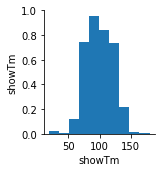

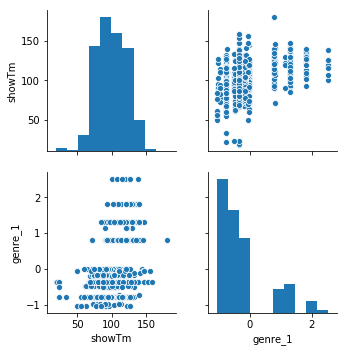

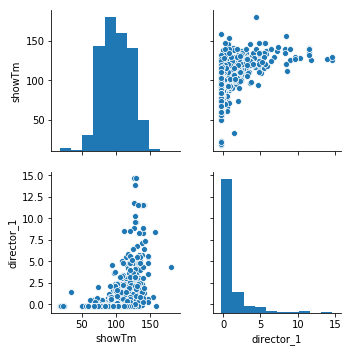

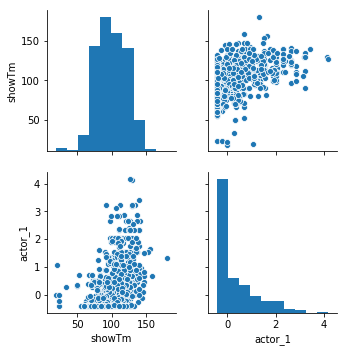

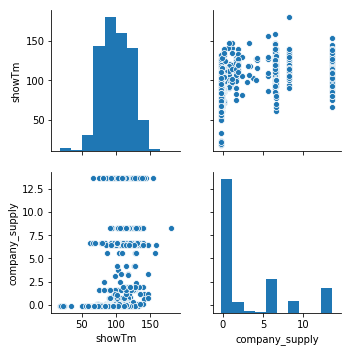

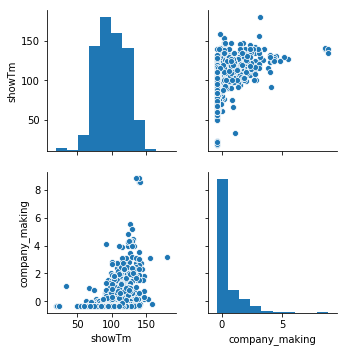

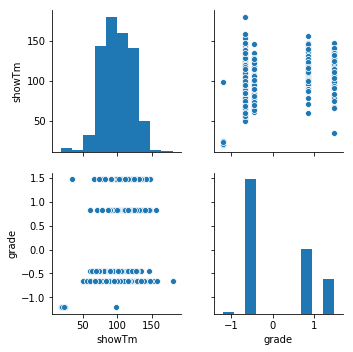

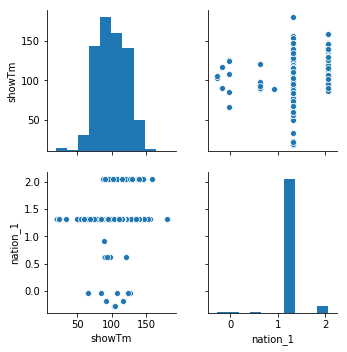

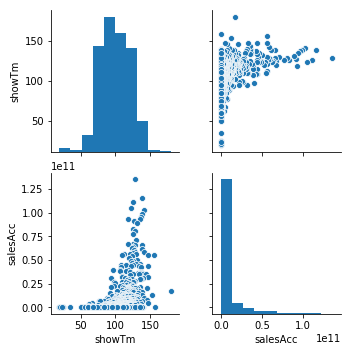

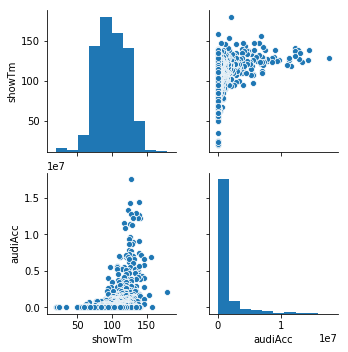

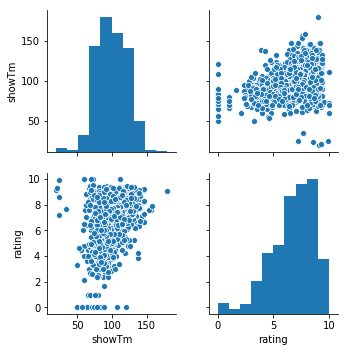

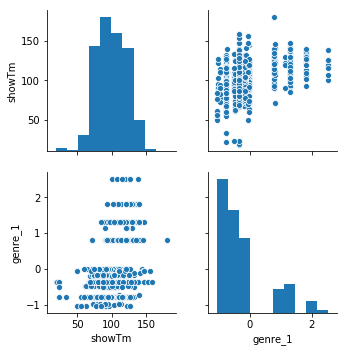

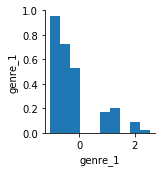

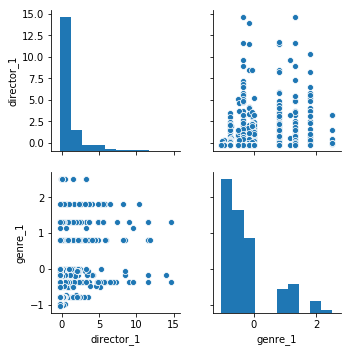

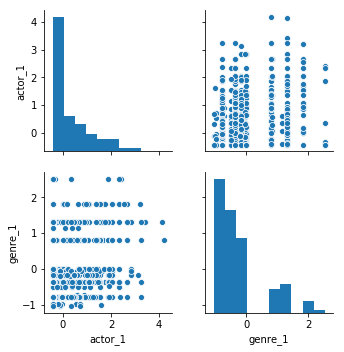

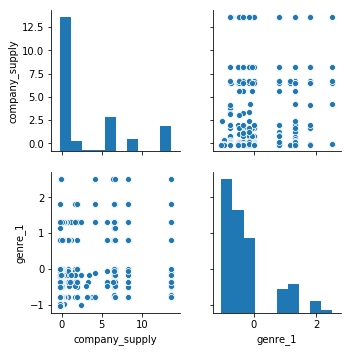

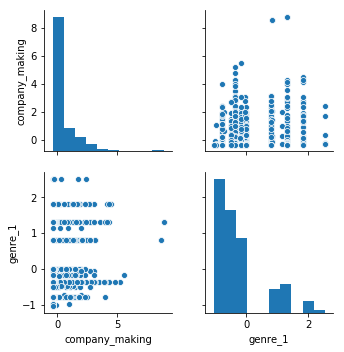

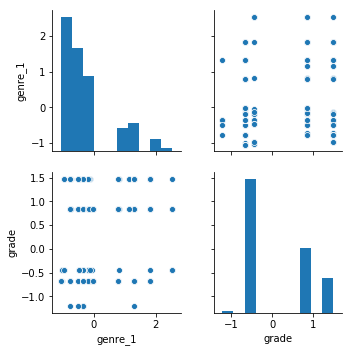

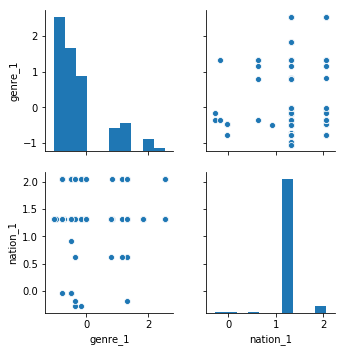

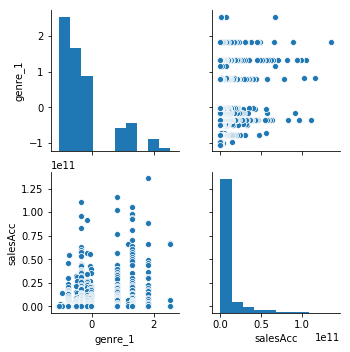

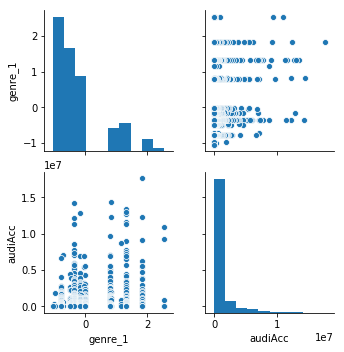

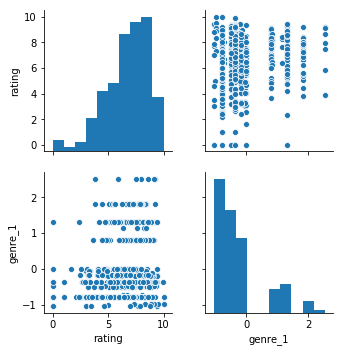

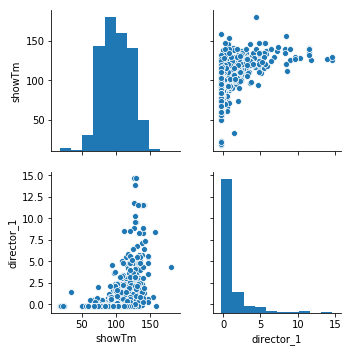

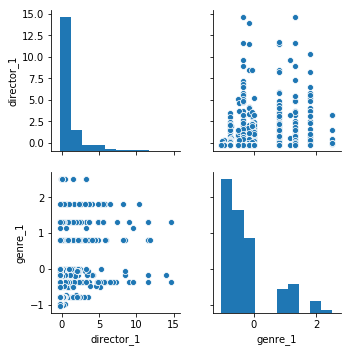

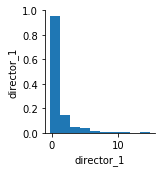

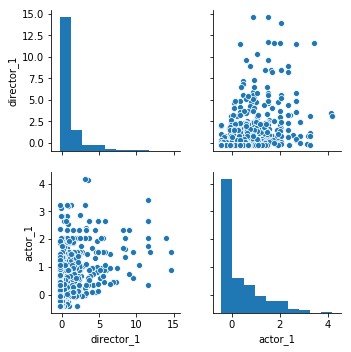

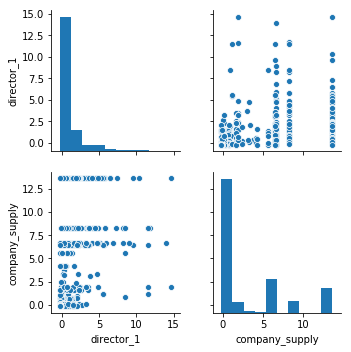

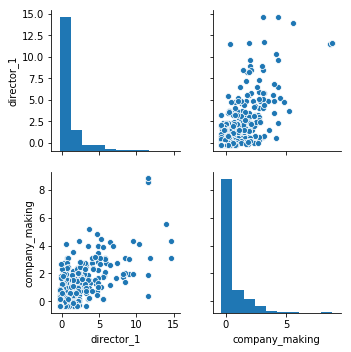

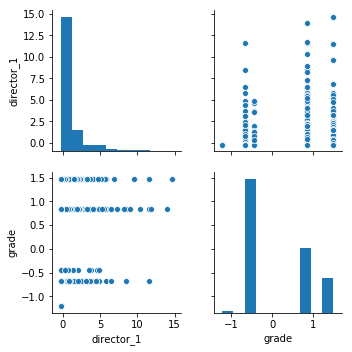

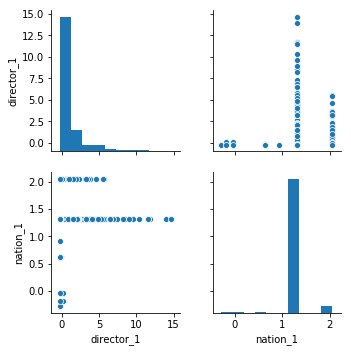

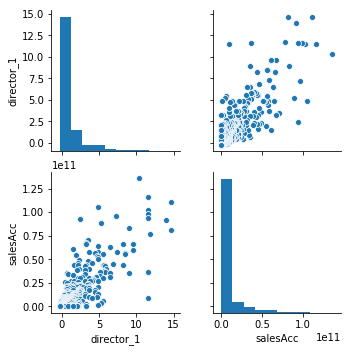

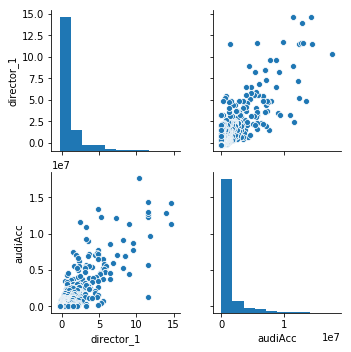

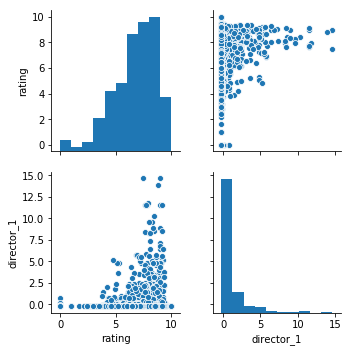

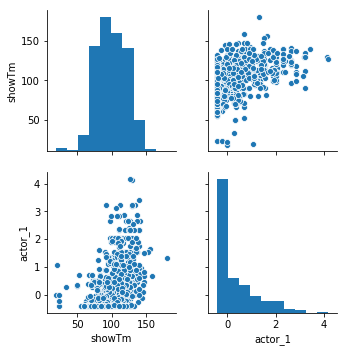

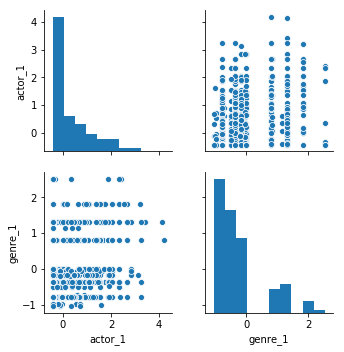

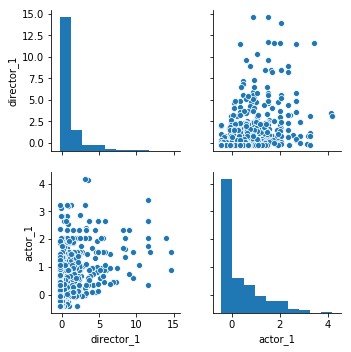

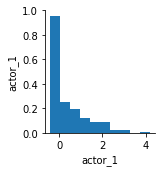

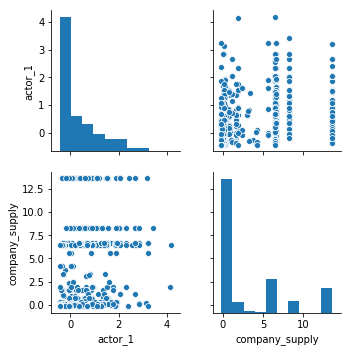

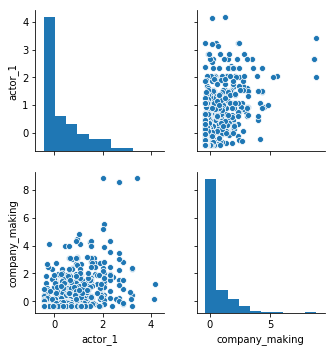

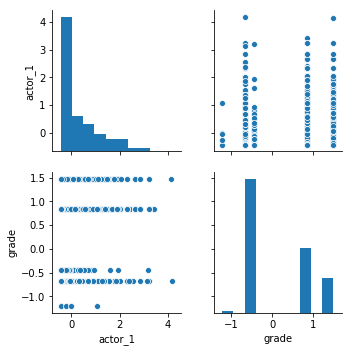

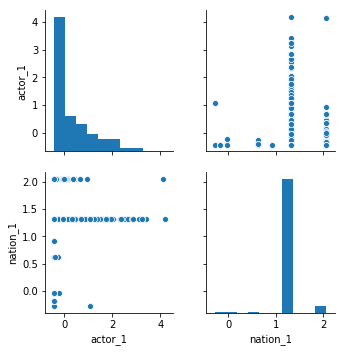

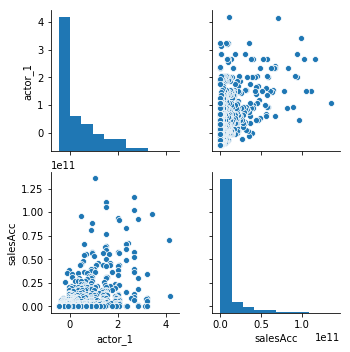

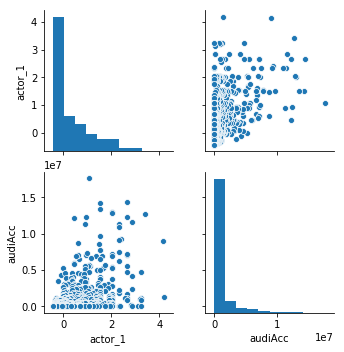

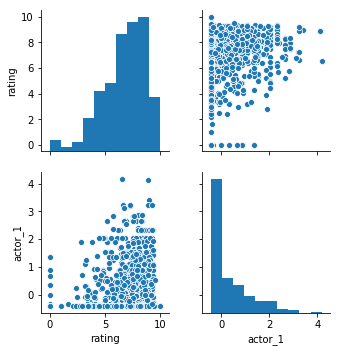

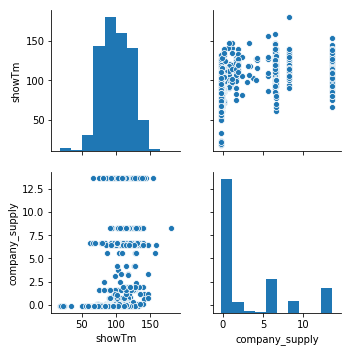

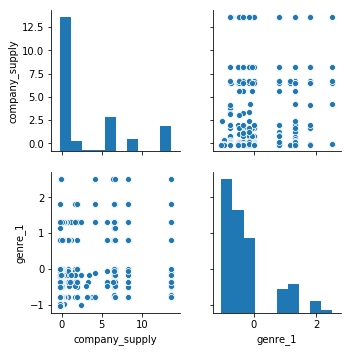

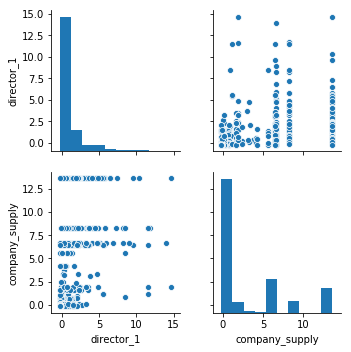

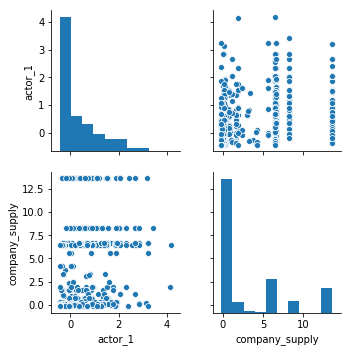

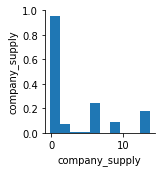

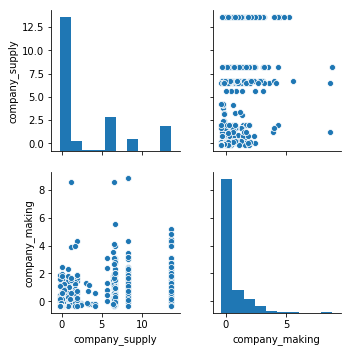

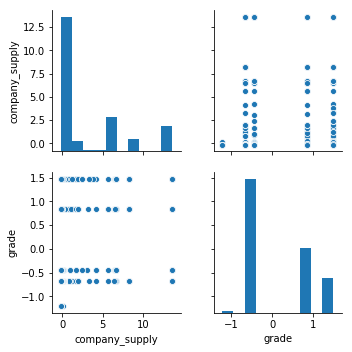

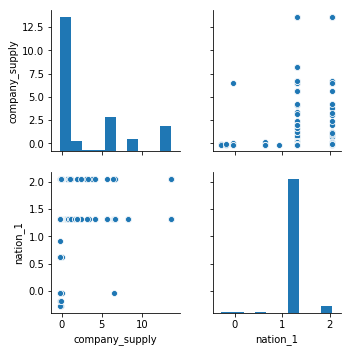

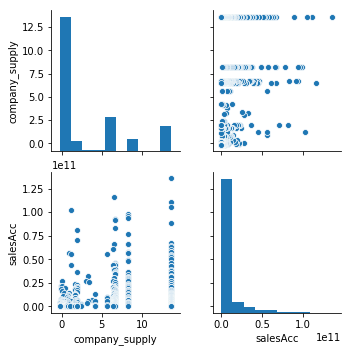

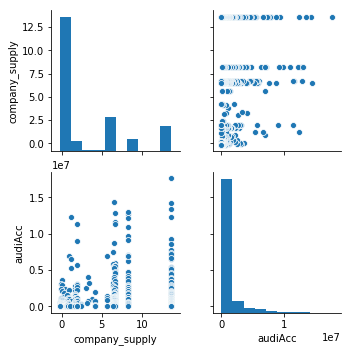

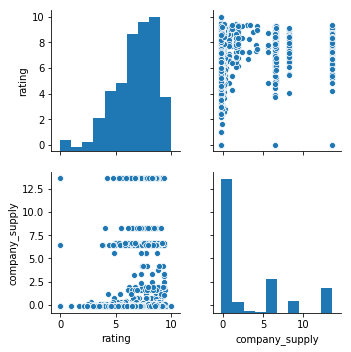

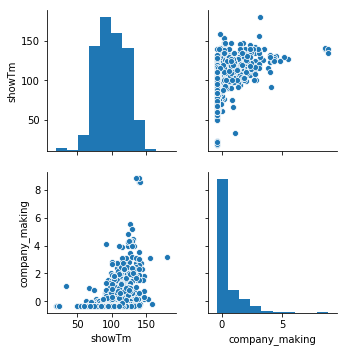

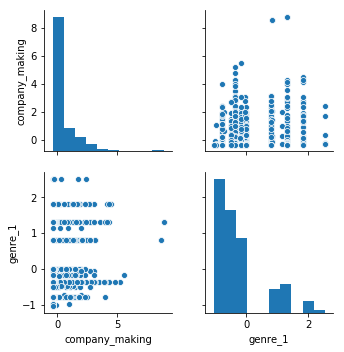

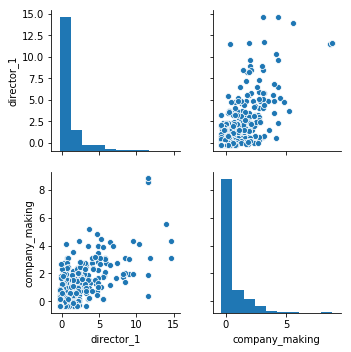

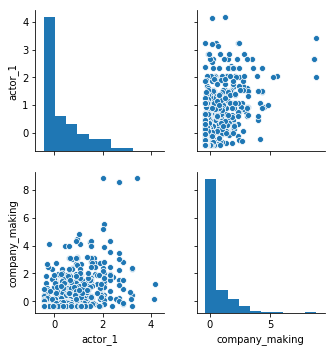

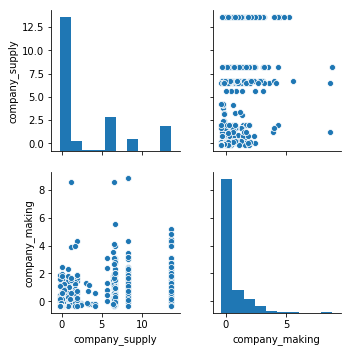

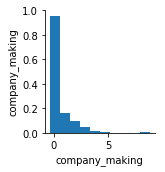

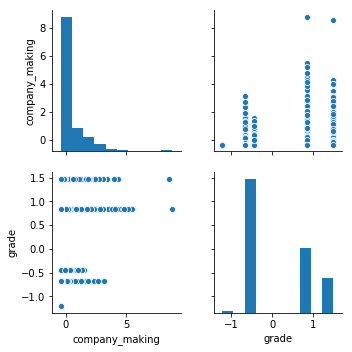

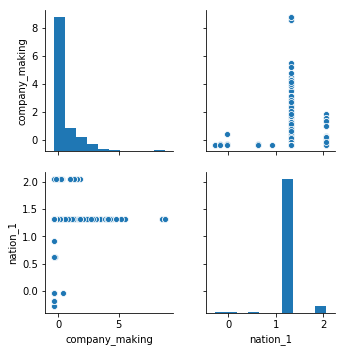

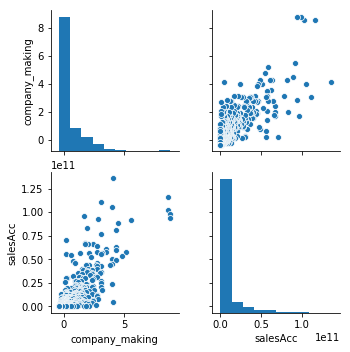

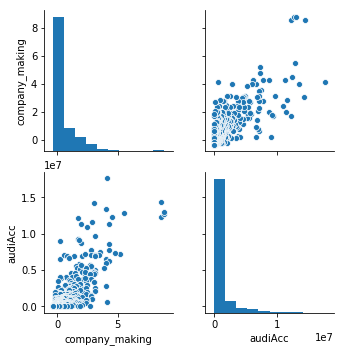

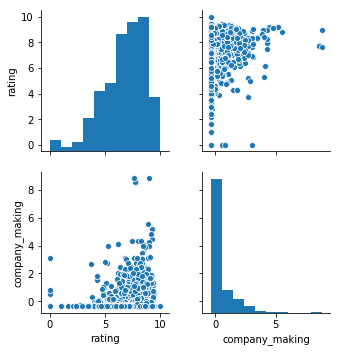

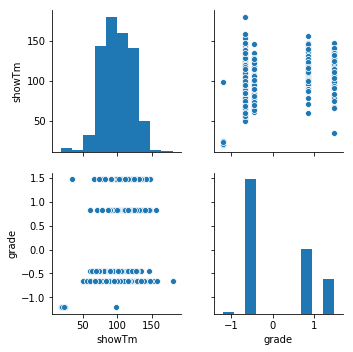

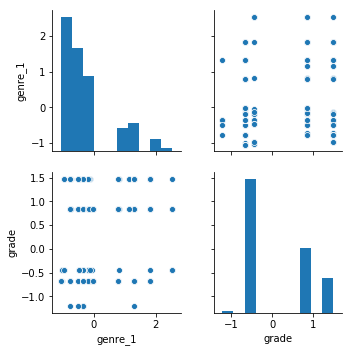

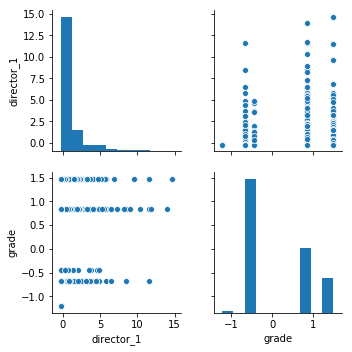

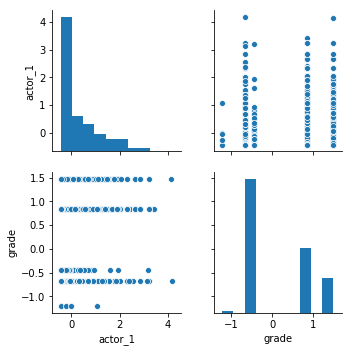

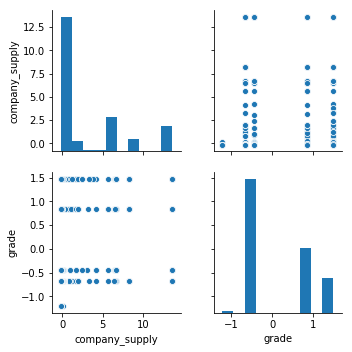

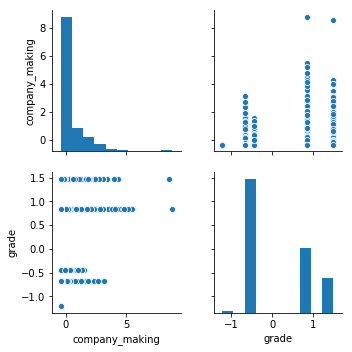

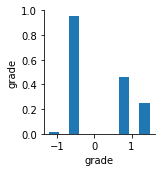

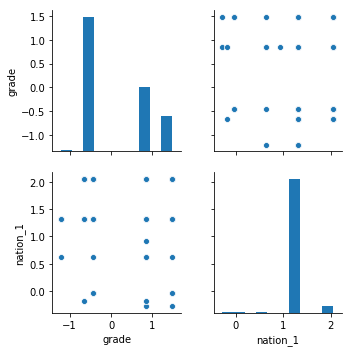

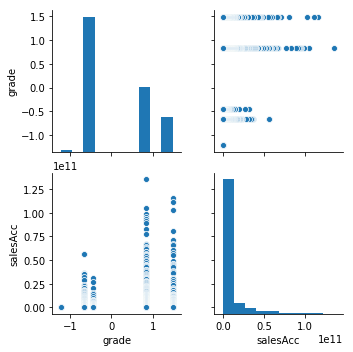

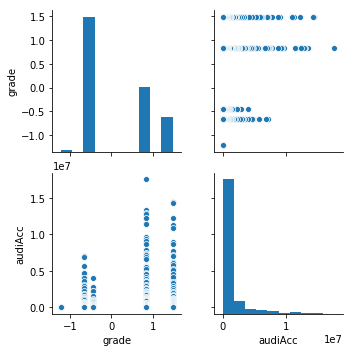

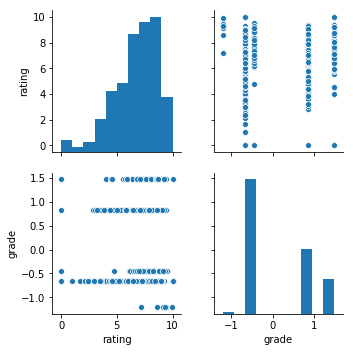

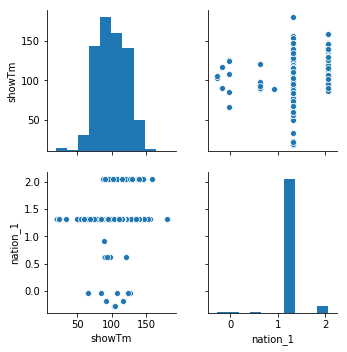

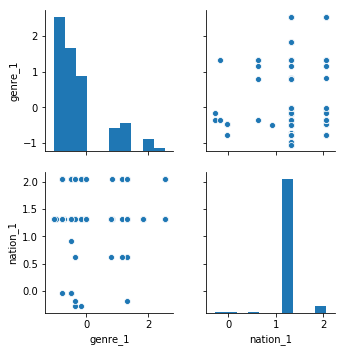

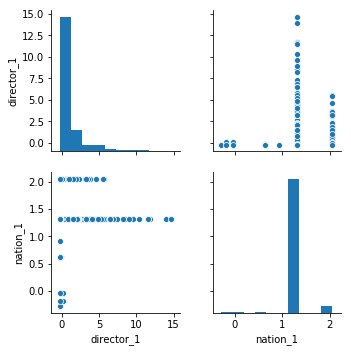

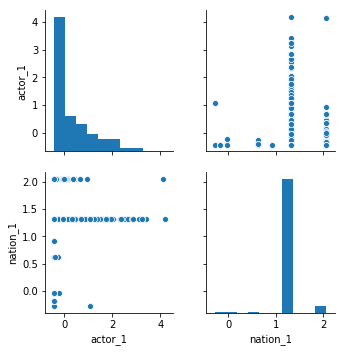

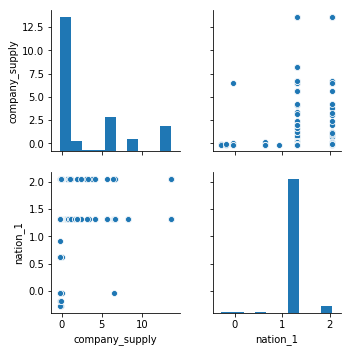

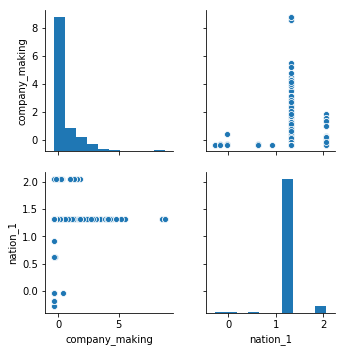

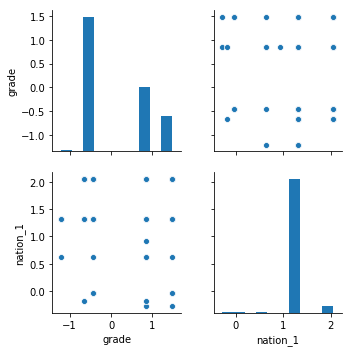

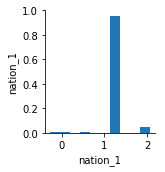

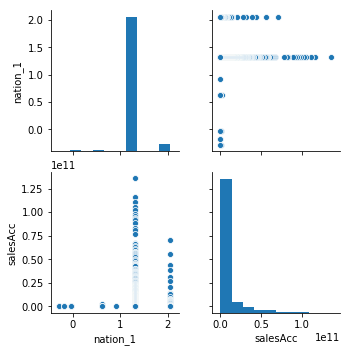

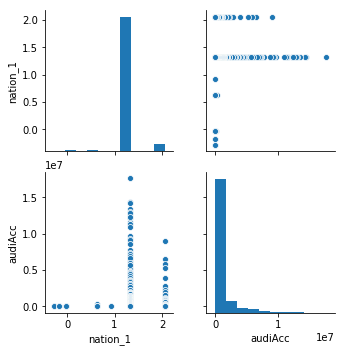

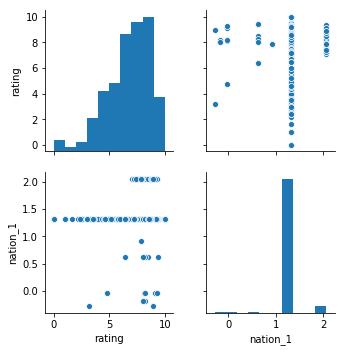

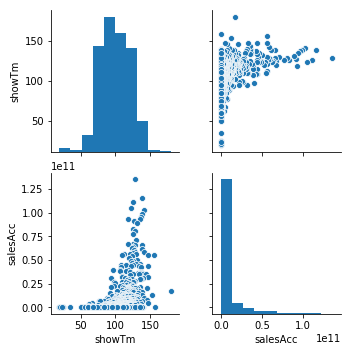

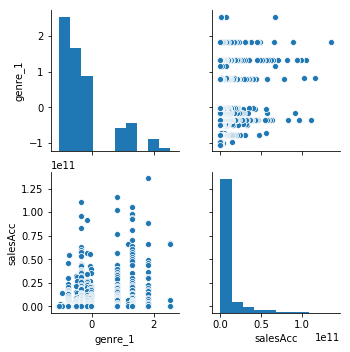

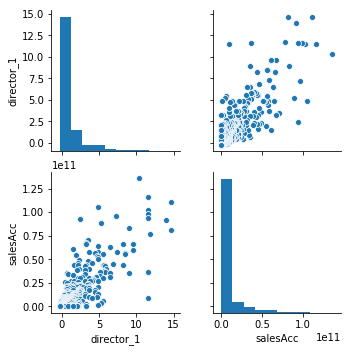

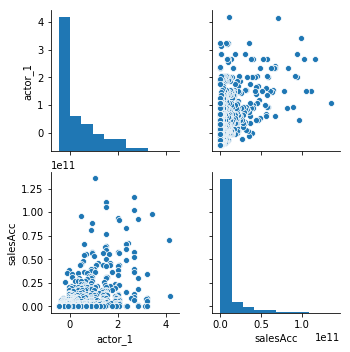

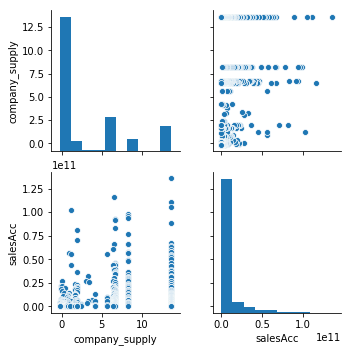

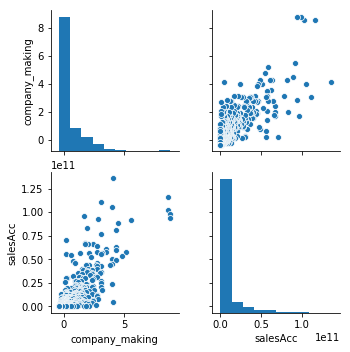

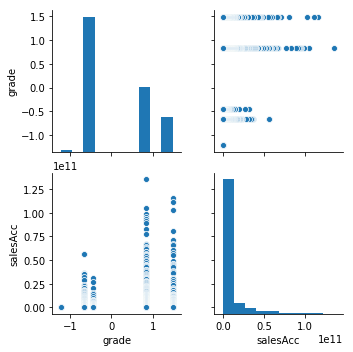

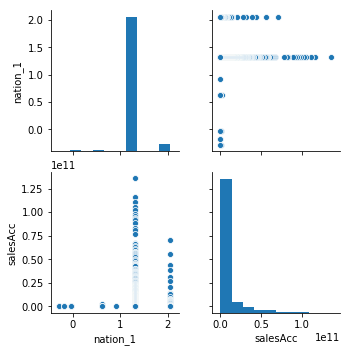

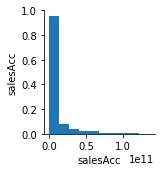

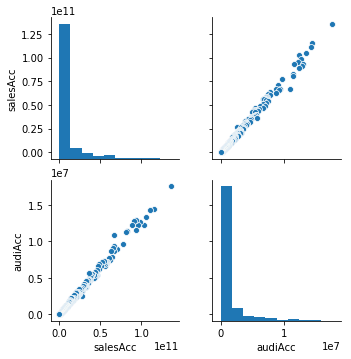

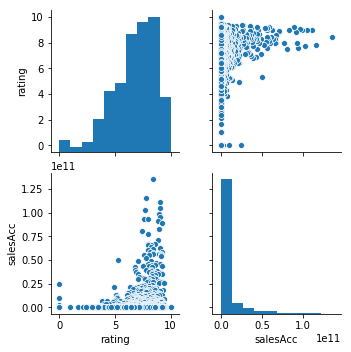

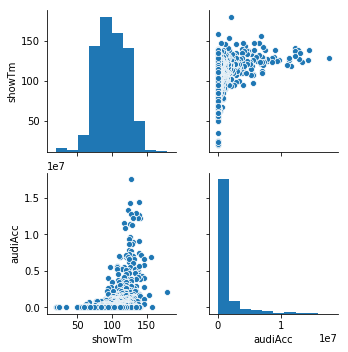

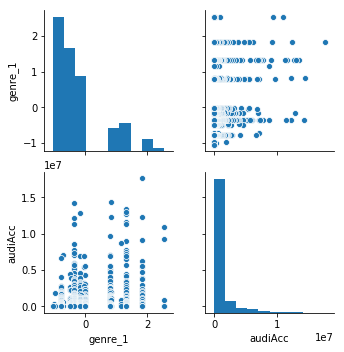

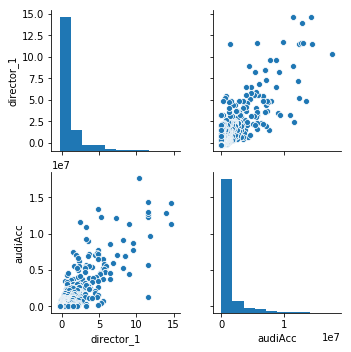

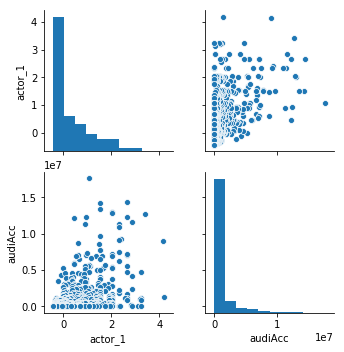

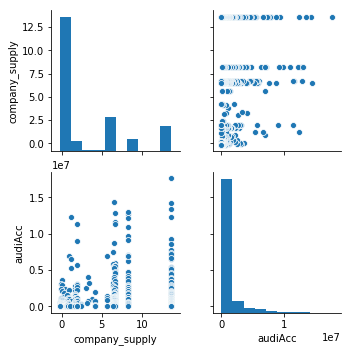

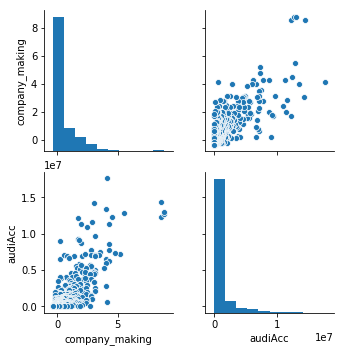

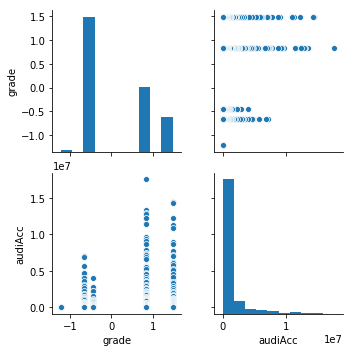

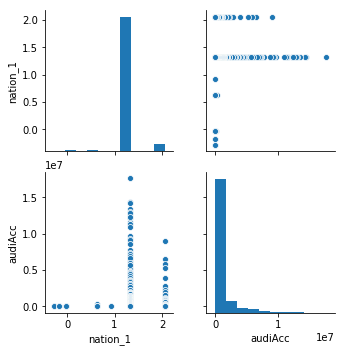

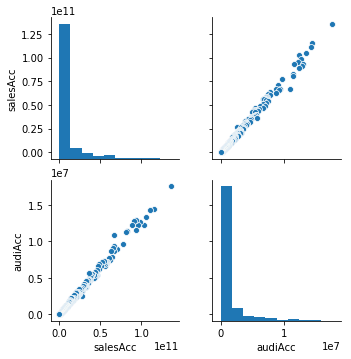

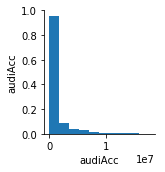

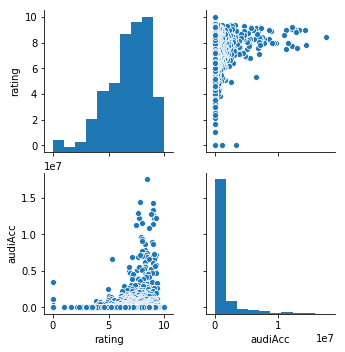

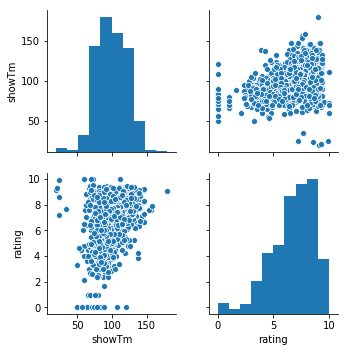

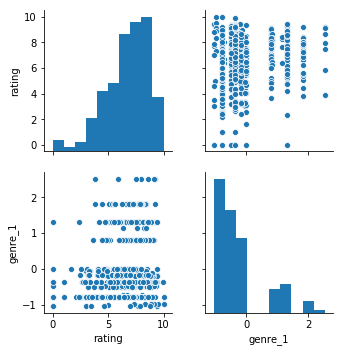

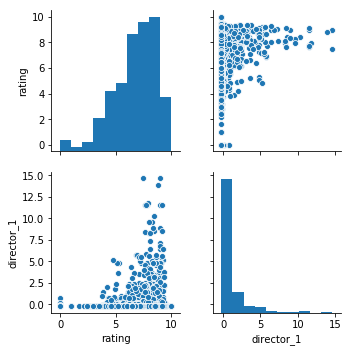

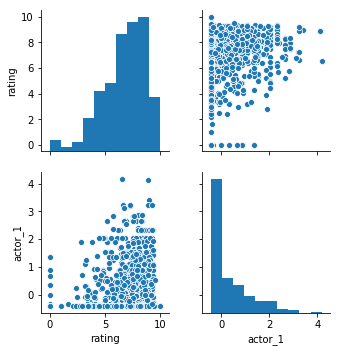

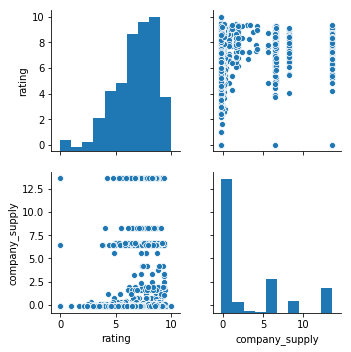

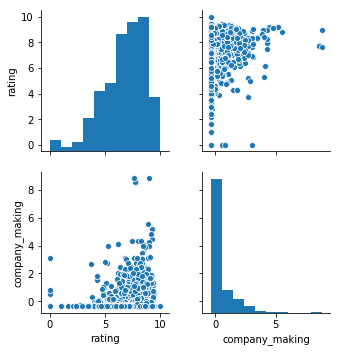

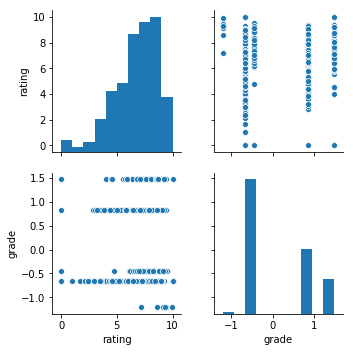

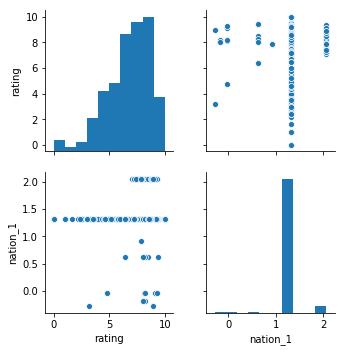

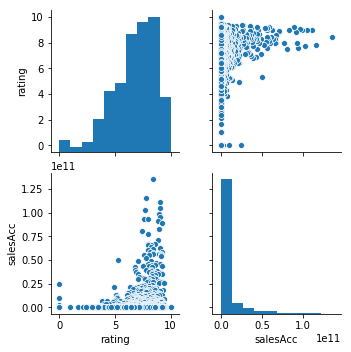

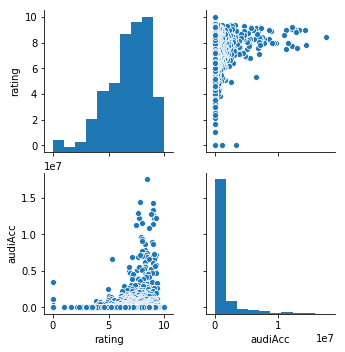

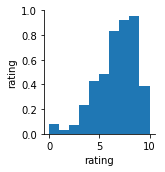

In [16]:
def feature_to_feature(feature_x, feature_y) :
    tmp = mov
    tmp_col = tmp.columns
    x_axis = feature_x
    y_axis = feature_y
    
    remain_col = [feature_x, feature_y]
    target_list = []
    for col in tmp_col :
        if(col not in remain_col) :
            target_list.append(col)
    tmp = tmp.drop(columns = [t for t in target_list])
    
    #plt.plot(tmp[x_axis], tmp[y_axis], '.')
    #plt.show()
    df = pd.DataFrame(data=tmp)
    sns.pairplot(df, diag_kind='auto')
    
for fx in remain_feature_list :
    for fy in remain_feature_list :
        print(fx + ' + ' + fy)
        feature_to_feature(fx, fy)

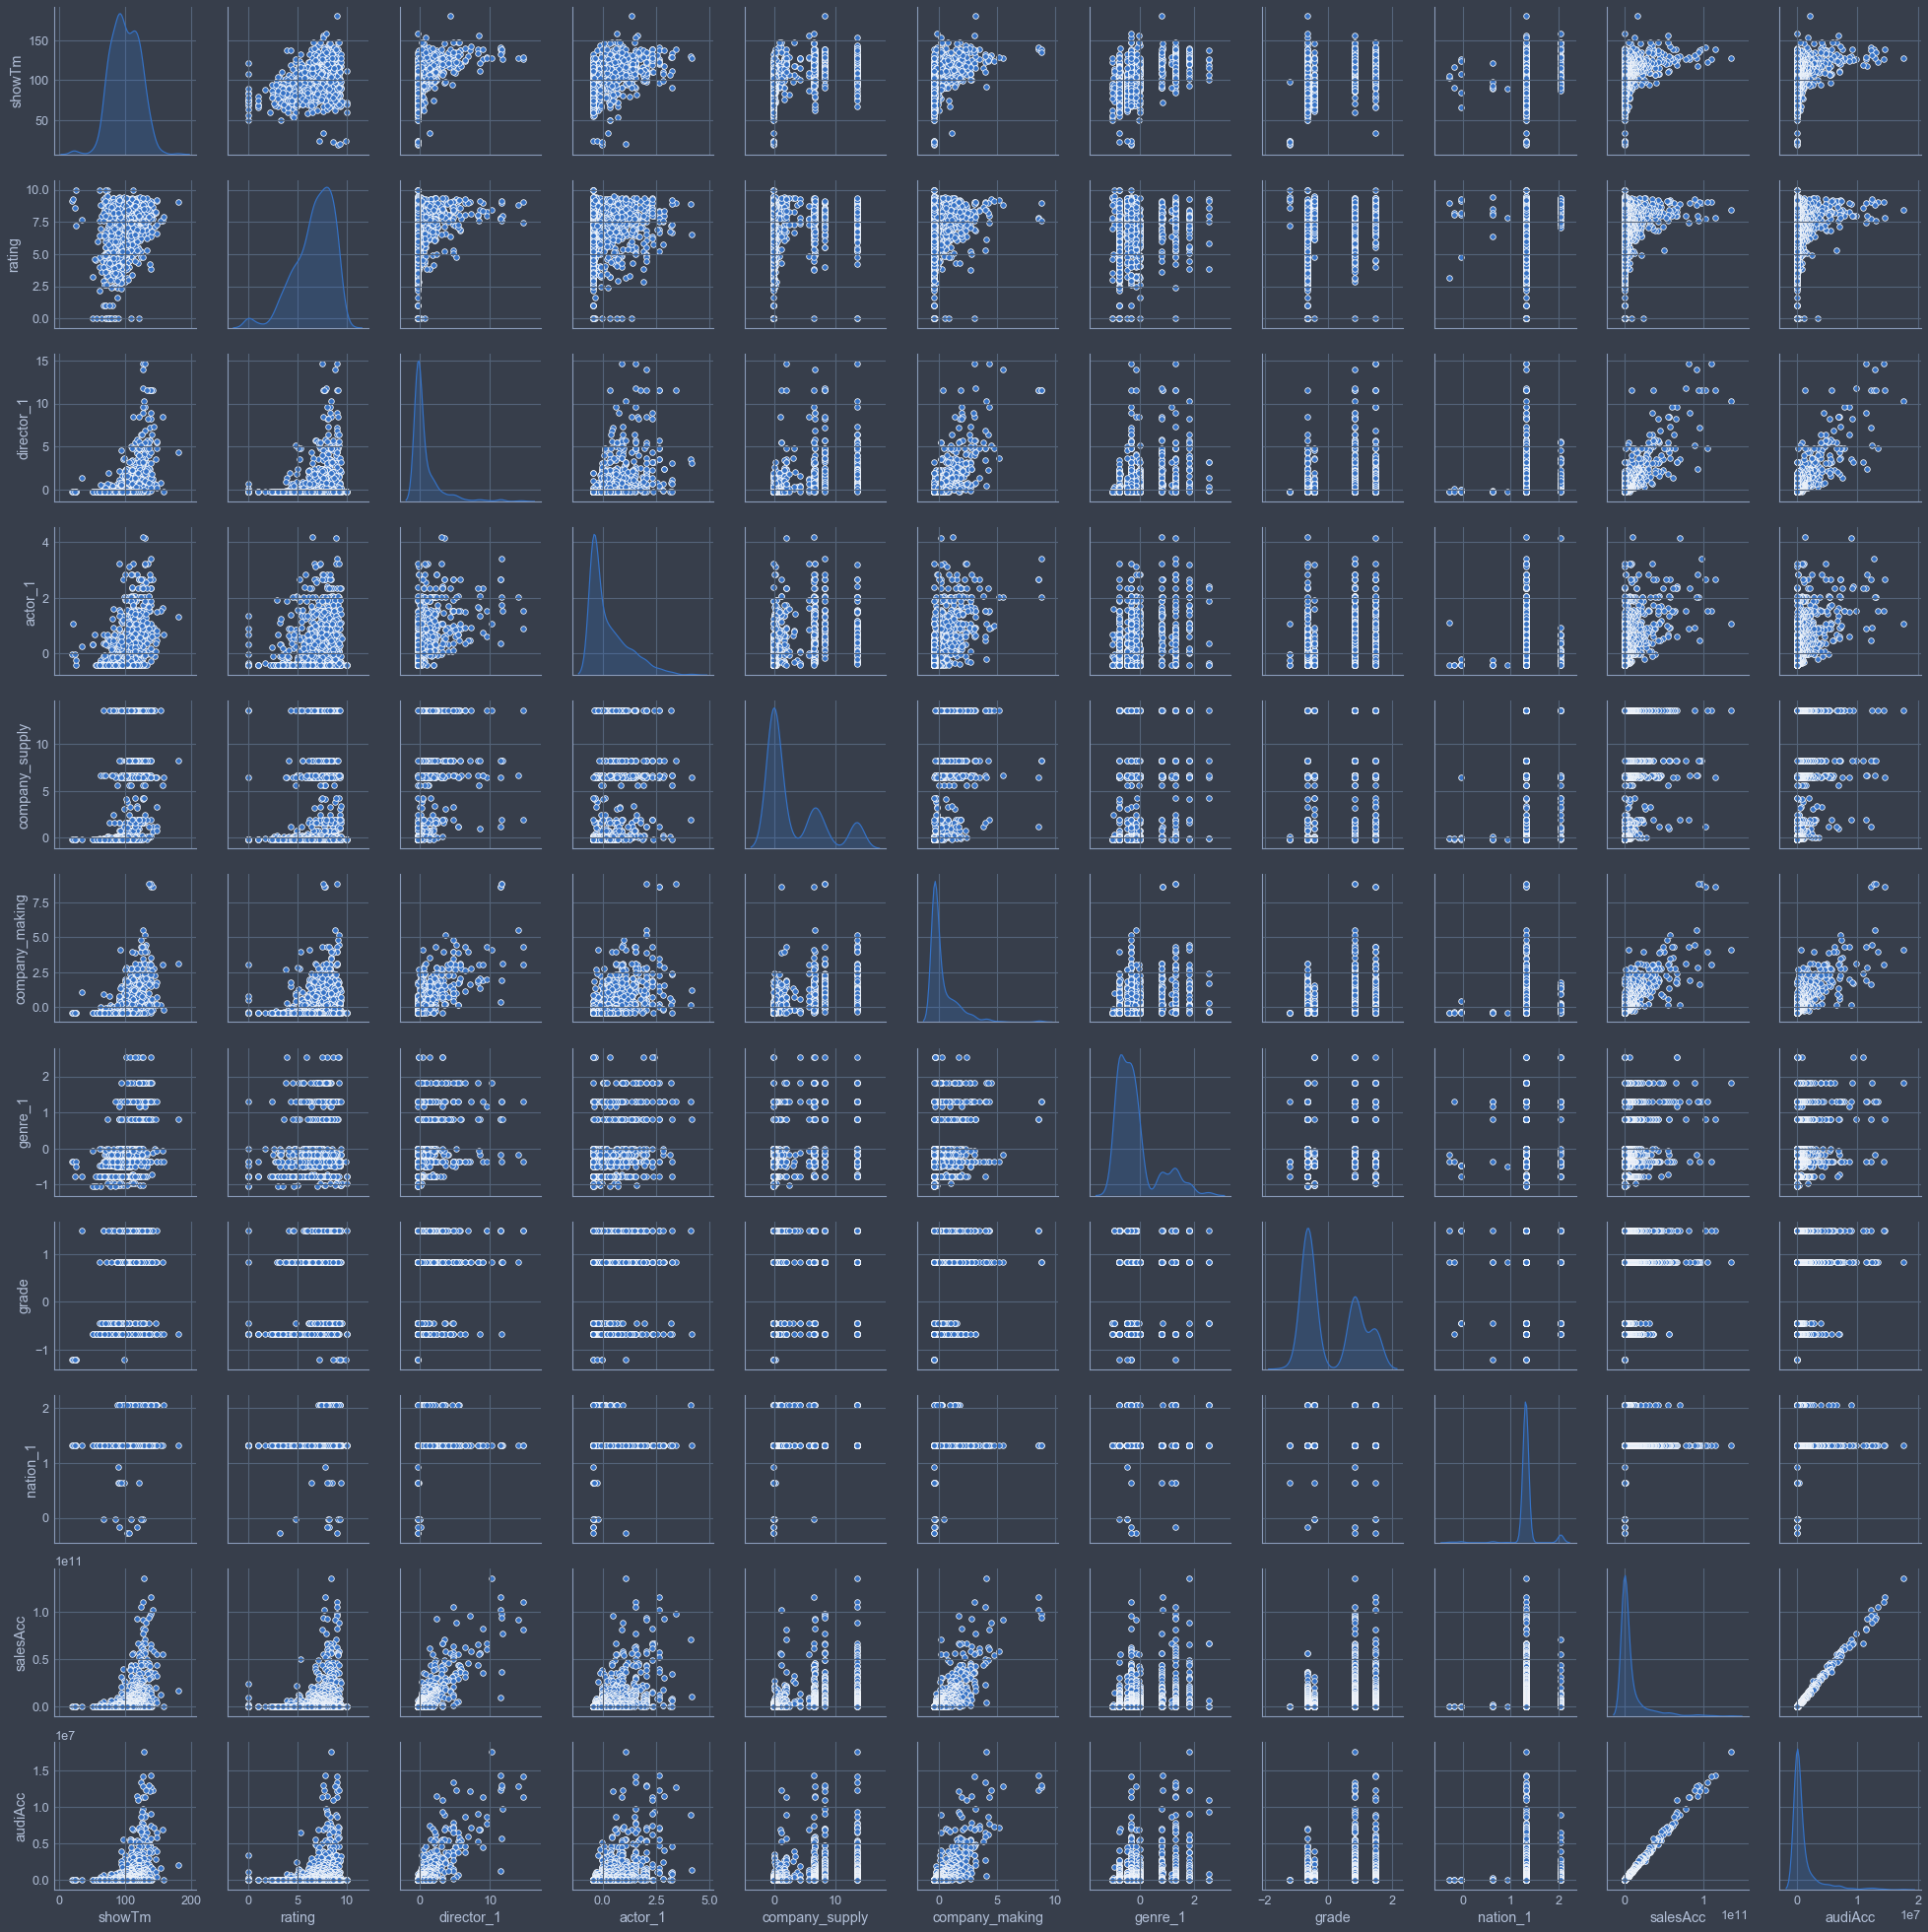

In [29]:
sns.pairplot(mov, diag_kind = 'kde')

In [30]:
mov['audiClass'] = 0

In [31]:
def classification_by_audiences(mo):
    for i in range(len(mo)):
        if float(mo.iloc[i, 10]) < 500000:
            mo.iloc[i, 11] = '~50만'
        elif float(mo.iloc[i, 10]) < 1000000:
            mo.iloc[i, 11] = '~100만'
        elif float(mo.iloc[i, 10]) < 2000000:
            mo.iloc[i, 11] = '~200만'
        elif float(mo.iloc[i, 10]) < 5000000:
            mo.iloc[i, 11] = '~500만'
        elif float(mo.iloc[i, 10]) < 10000000:
            mo.iloc[i, 11] = '~1000만'
        else :
            mo.iloc[i, 11] = '1000만~'
            
    return mo

mo = classification_by_audiences(mov)

In [33]:
mo

showTm  rating  director_1   actor_1  company_supply  company_making  \
0      128.0    8.45   10.295296  1.062385       13.607305        4.110119   
1      139.0    7.83   11.535326  2.662268        6.469050        8.587130   
2      126.0    9.01   14.650529  1.526080       13.607305        3.069531   
3      123.0    9.01    4.836839  1.526080       13.607305        3.998974   
4      141.0    7.71   11.535326  2.662268        1.201644        8.587130   
6      139.0    8.97   11.566712  3.413547        8.250308        8.804873   
7      137.0    9.04    7.196371  0.458925        8.250308        1.684485   
8      135.0    7.61   11.566712  2.024904        8.250308        8.804873   
9      118.0    7.99    2.400862  2.852731        6.667476        2.840431   
10     127.0    8.83   13.944745  2.038548        6.667476        5.528284   
11     131.0    9.24    5.185889  0.944470       13.607305        4.476007   
13     126.0    8.98    8.940929  2.328853        6.667476        1.956953   
16     129.0    7.47   14.650529  0.889360        1.939161        4.303548   
18     126.0    7.94   11.755141  1.526080        8.250308        3.113172   
20     130.0    8.86    3.508220  4.130566        1.941046        0.193035   
21     125.0    7.97    3.220323  2.414048       13.607305        1.721586   
22     119.0    8.62    3.220323  2.328853        8.250308        2.430352   
23     129.0    8.27    9.575941  0.609942        6.469050        1.986116   
24     139.0    7.98    8.253283  2.328853        8.250308        1.759801   
25     125.0    8.27    4.813995  1.530002       13.607305        2.789353   
26     124.0    9.00    6.456884  1.479777       13.607305        4.283684   
27     139.0    8.42    1.444369  2.328853        6.436050        3.531738   
28     127.0    7.98    9.575941  1.526080       13.607305        4.303548   
30     129.0    9.23    3.682721  2.024904       13.607305        5.185071   
31     142.0    8.10    7.318942  0.944470       13.607305        2.749246   
32     126.0    8.37    4.813995  2.662268        8.250308        3.457238   
33     130.0    8.99    4.380915  0.944470        8.250308        3.143448   
34     112.0    8.45    8.516486  2.049145        8.250308        2.063107   
35     121.0    9.14    8.497478  1.370228        0.907158        1.381222   
36     147.0    9.12    5.457570  0.669990        1.201644        0.193035   
...      ...     ...         ...       ...             ...             ...   
3140    91.0    9.20   -0.240411 -0.354536       -0.150207       -0.370171   
3143    70.0    4.93   -0.240210 -0.427873       -0.161766       -0.368001   
3145    88.0    5.73   -0.240382 -0.111155       -0.162678        0.151308   
3153   115.0    6.52   -0.240369  0.218852       -0.040057       -0.270211   
3154    77.0    3.00   -0.240380 -0.428505       -0.165413       -0.370152   
3188    90.0    7.25   -0.240265 -0.428524       -0.165280       -0.369471   
3189    87.0    2.95   -0.240168 -0.428527       -0.165336       -0.370032   
3194    87.0    5.81   -0.240416 -0.428465       -0.165418       -0.370174   
3197    75.0    4.34   -0.240416 -0.428262       -0.165418       -0.370174   
3208    70.0    3.60   -0.240286 -0.428535       -0.163364       -0.369915   
3295    55.0    4.50   -0.240286 -0.428537       -0.163364       -0.369915   
3328    53.0    4.60   -0.240286  0.697545       -0.163364       -0.369915   
3329    50.0    0.00   -0.240286  0.334631       -0.163364       -0.369915   
3331    56.0    0.00   -0.240286 -0.419152       -0.163364       -0.369915   
3337   115.0    8.72    1.444369  0.081722       -0.029301       -0.138282   
3385    78.0    8.63   -0.238579  0.157495       -0.039740       -0.363970   
3396    88.0    6.00   -0.240452 -0.428556       -0.165419       -0.370196   
3404    24.0    9.93   -0.240446 -0.428530       -0.165407       -0.370173   
3414    24.0    7.20   -0.239628 -0.239014       -0.165407       -0.370173   
3446   111.0   10.00   -0.24

In [14]:
import matplotlib.font_manager as fm

font_path = '/Library/Fonts/NanumBarunGothic.otf'
font_name=fm.FontProperties(fname=font_path, size=12).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumBarunGothicOTF


In [15]:
from jupyterthemes import jtplot

jtplot.style(theme = 'onedork')

LinAlgError: singular matrix

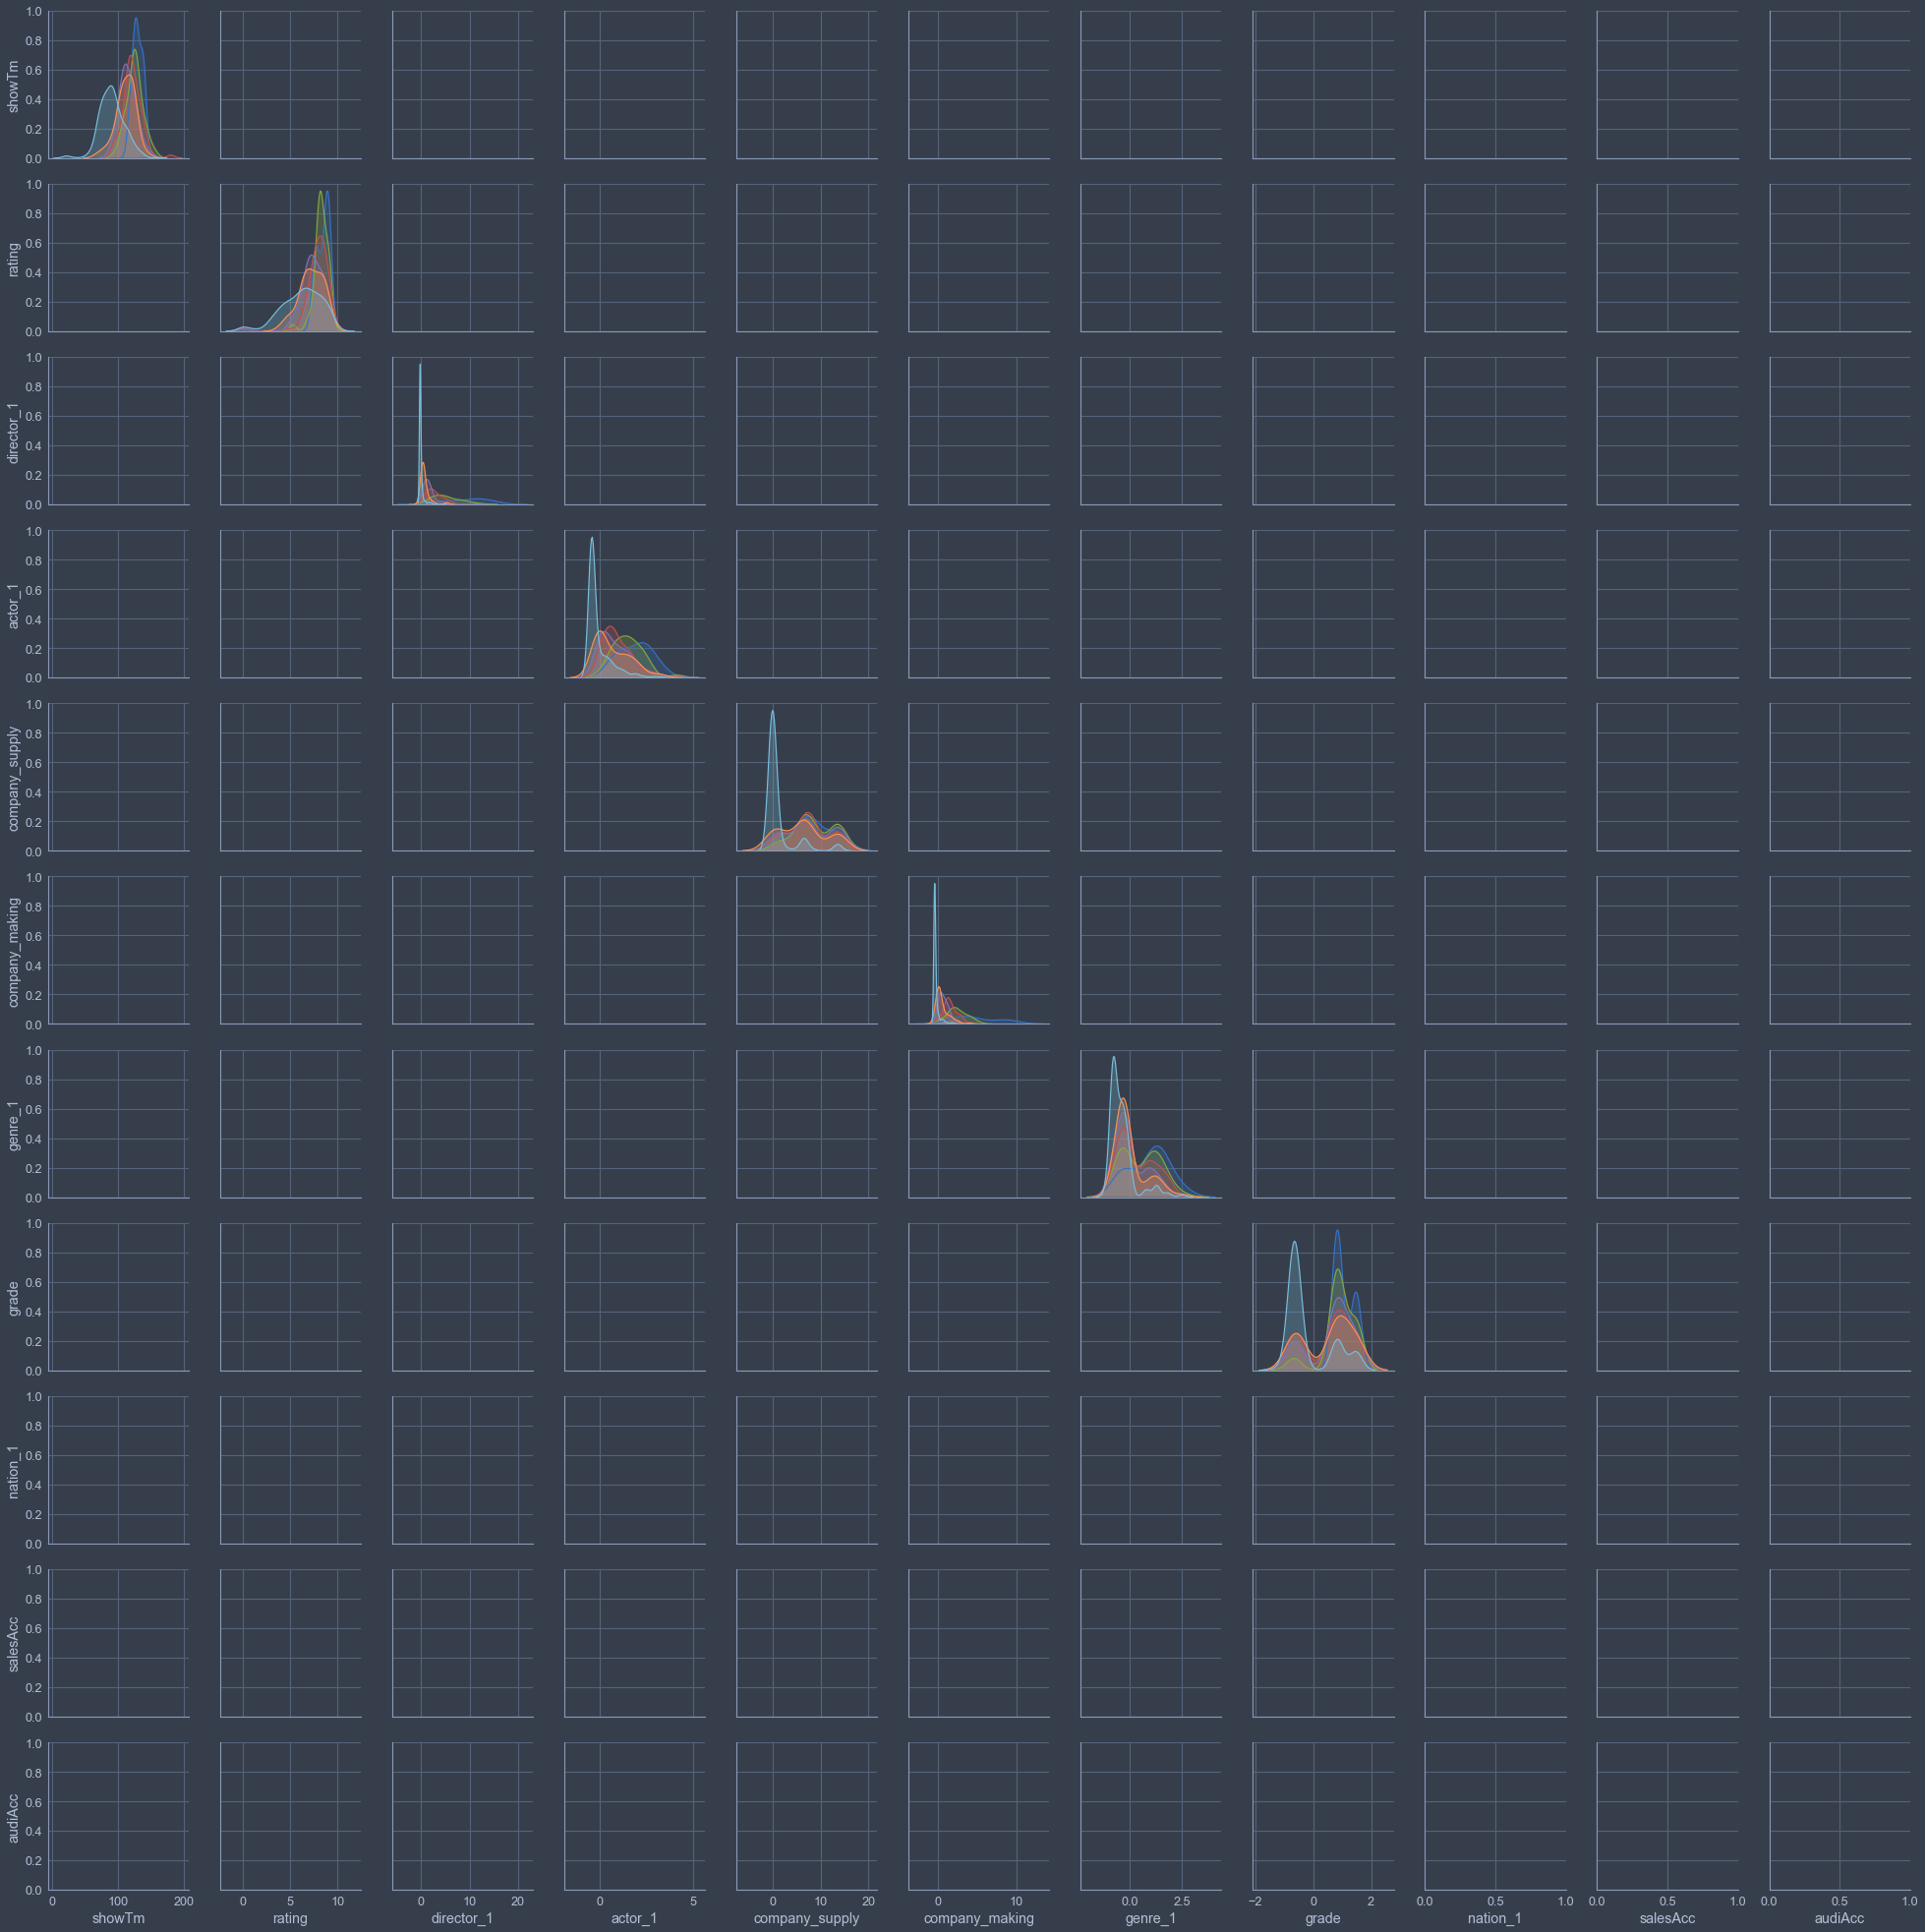

In [40]:
sns.pairplot(mo, diag_kind = 'kde', hue = 'audiClass')

### 3. other information

In [79]:
movie_sort = movie.sort_values(by='salesAcc', ascending = False).reset_index(drop = True)

In [81]:
movie_sort = movie_sort.drop(columns=['Unnamed: 0']).reset_index(drop = True)

In [82]:
movie_sort

movieCd  showTm  rating  director_cnt  director_1  director_2  \
0     20129370   128.0    8.45             1   10.295296         NaN   
1     20150976   139.0    7.83             1   11.535326         NaN   
2     20137048   126.0    9.01             1   14.650529         NaN   
3     20148048   123.0    9.01             1    4.836839         NaN   
4     20186202   141.0    7.71             1   11.535326         NaN   
5     20177478   149.0     NaN             2   10.324711   10.324711   
6     20148851   139.0     NaN             1   11.566712         NaN   
7     20162869   137.0    9.04             1    7.196371         NaN   
8     20124034   135.0     NaN             1   11.566712         NaN   
9     20156564   118.0     NaN             1    2.400862         NaN   
10    20127593   127.0    8.83             1   13.944745         NaN   
11    20124079   131.0    9.24             1    5.185889         NaN   
12    20148493   141.0     NaN             1   13.502481         NaN   
13    20134803   126.0    8.98             1    8.940929         NaN   
14    20149120   169.0    9.09             1    5.611186         NaN   
15    20136803   108.0     NaN             2   12.552381   12.552381   
16    20090074   129.0    7.47             1   14.650529         NaN   
17    20185485   134.0    9.42             1    4.306554         NaN   
18    20145507   126.0    7.94             1   11.755141         NaN   
19    20159364   147.0    8.67             2   10.324711   10.324711   
20    20121621   130.0    8.86             1    3.508220         NaN   
21    20126674   125.0    7.97             1    3.220323         NaN   
22    20060151   119.0     NaN             1    3.220323         NaN   
23    20136064   129.0    8.27             1    9.575941         NaN   
24    20126091   139.0    7.98             1    8.253283         NaN   
25    20151228   125.0    8.27             1    4.813995         NaN   
26    20131102   124.0    9.00             1    6.456884         NaN   
27    20159646   139.0    8.42             1    1.444369         NaN   
28    20136068   127.0     NaN             1    9.575941         NaN   
29    20167303   133.0     NaN             1    4.345188         NaN   
...        ...     ...     ...           ...         ...         ...   
3652  19710075    90.0    0.00             1   -0.222695         NaN   
3653  20081555    21.0    8.79             1   -0.228045         NaN   
3654  19790012   120.0    8.67             1   -0.222695         NaN   
3655  19960010   102.0     NaN             1   -0.222664         NaN   
3656  19830047    95.0    8.67             1   -0.240296         NaN   
3657  20154128   108.0    7.67             1   -0.240049         NaN   
3658  20134414    19.0    0.00             0         NaN         NaN   
3659  20134415    18.0    5.50             1   -0.240458         NaN   
3660  20185582     NaN     NaN             0         NaN         NaN   
3661  19980009   100.0    8.58             1   -0.240458         NaN   
3662  19790050   110.0    8.08             1   -0.222695         NaN   
3663  20140222     NaN     NaN             1   -0.240433         NaN   
3664  20158762    70.0     NaN             0         NaN         NaN   
3665  20157217    46.0     NaN             0         NaN         NaN   
3666  20140444    50.0    7.75             1   -0.240458         NaN   
3667  19760004    95.0    7.57             1   -0.222695         NaN   
3668  20179928    50.0    0.00             0         NaN         NaN   
3669  19988647    20.0    8.00             1   -0.190276         NaN   
3670  19750021   105.0    0.00             1   -0.222695         NaN   
3671  20149348    77.0    9.31             1   -0.240458         NaN   
3672  19800047    95.0   10.00             1   -0.222695         NaN   
3673  20135502    20.0    0.00             1   -0.240458         NaN   
3674  20153646    48.0     NaN             0         NaN         NaN   
3675  20058808   105.0     NaN             1   

In [ ]:
movie_sort = movie_sort.drop(columns=['Unnamed: 0']).reset_index(drop = True)testesttestestestestestestestes

## missing value imputing

In [44]:
def missing_value_imputing_actor(ref, actor_cnt):
    remain_feature_list = ['showTm', 'genre_1', 'director_1', 'actor_1',
               'company_supply', 'company_making', 'grade', 'nation_1',
               'salesAcc', 'audiAcc',
               'rating']

    remove_feature_list = ['movieCd', 'genre_2', 'genre_3', 'director_2', 'actor_2',
                       'actor_3', 'actor_4', 'actor_5', 'nation_2',
                       'nation_cnt', 'actor_cnt', 'director_cnt', 'genre_cnt',
                       'director', 'actor', 'genre', 'nation']
    
    return mo

movie_actor_3 = missing_value_imputing_actor(movie, 3)

showTm  rating  director_1   actor_1  company_supply  company_making  \
0      128.0    8.45   10.295296  1.062385       13.607305        4.110119   
1      139.0    7.83   11.535326  2.662268        6.469050        8.587130   
2      126.0    9.01   14.650529  1.526080       13.607305        3.069531   
3      123.0    9.01    4.836839  1.526080       13.607305        3.998974   
4      141.0    7.71   11.535326  2.662268        1.201644        8.587130   
6      139.0    8.97   11.566712  3.413547        8.250308        8.804873   
7      137.0    9.04    7.196371  0.458925        8.250308        1.684485   
8      135.0    7.61   11.566712  2.024904        8.250308        8.804873   
9      118.0    7.99    2.400862  2.852731        6.667476        2.840431   
10     127.0    8.83   13.944745  2.038548        6.667476        5.528284   
11     131.0    9.24    5.185889  0.944470       13.607305        4.476007   
13     126.0    8.98    8.940929  2.328853        6.667476        1.956953   
16     129.0    7.47   14.650529  0.889360        1.939161        4.303548   
18     126.0    7.94   11.755141  1.526080        8.250308        3.113172   
20     130.0    8.86    3.508220  4.130566        1.941046        0.193035   
21     125.0    7.97    3.220323  2.414048       13.607305        1.721586   
22     119.0    8.62    3.220323  2.328853        8.250308        2.430352   
23     129.0    8.27    9.575941  0.609942        6.469050        1.986116   
24     139.0    7.98    8.253283  2.328853        8.250308        1.759801   
25     125.0    8.27    4.813995  1.530002       13.607305        2.789353   
26     124.0    9.00    6.456884  1.479777       13.607305        4.283684   
27     139.0    8.42    1.444369  2.328853        6.436050        3.531738   
28     127.0    7.98    9.575941  1.526080       13.607305        4.303548   
30     129.0    9.23    3.682721  2.024904       13.607305        5.185071   
31     142.0    8.10    7.318942  0.944470       13.607305        2.749246   
32     126.0    8.37    4.813995  2.662268        8.250308        3.457238   
33     130.0    8.99    4.380915  0.944470        8.250308        3.143448   
34     112.0    8.45    8.516486  2.049145        8.250308        2.063107   
35     121.0    9.14    8.497478  1.370228        0.907158        1.381222   
36     147.0    9.12    5.457570  0.669990        1.201644        0.193035   
...      ...     ...         ...       ...             ...             ...   
3140    91.0    9.20   -0.240411 -0.354536       -0.150207       -0.370171   
3143    70.0    4.93   -0.240210 -0.427873       -0.161766       -0.368001   
3145    88.0    5.73   -0.240382 -0.111155       -0.162678        0.151308   
3153   115.0    6.52   -0.240369  0.218852       -0.040057       -0.270211   
3154    77.0    3.00   -0.240380 -0.428505       -0.165413       -0.370152   
3188    90.0    7.25   -0.240265 -0.428524       -0.165280       -0.369471   
3189    87.0    2.95   -0.240168 -0.428527       -0.165336       -0.370032   
3194    87.0    5.81   -0.240416 -0.428465       -0.165418       -0.370174   
3197    75.0    4.34   -0.240416 -0.428262       -0.165418       -0.370174   
3208    70.0    3.60   -0.240286 -0.428535       -0.163364       -0.369915   
3295    55.0    4.50   -0.240286 -0.428537       -0.163364       -0.369915   
3328    53.0    4.60   -0.240286  0.697545       -0.163364       -0.369915   
3329    50.0    0.00   -0.240286  0.334631       -0.163364       -0.369915   
3331    56.0    0.00   -0.240286 -0.419152       -0.163364       -0.369915   
3337   115.0    8.72    1.444369  0.081722       -0.029301       -0.138282   
3385    78.0    8.63   -0.238579  0.157495       -0.039740       -0.363970   
3396    88.0    6.00   -0.240452 -0.428556       -0.165419       -0.370196   
3404    24.0    9.93   -0.240446 -0.428530       -0.165407       -0.370173   
3414    24.0    7.20   -0.239628 -0.239014       -0.165407       -0.370173   
3446   111.0   10.00   -0.24